In [ ]:
#link for dat

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('Indian_IPO_Market_Data.csv')

In [5]:
df.head()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [6]:
df.shape

(319, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


In [8]:
df['Listing_Gains_Percent'].describe()

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64

In [9]:
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000
max,21000.000000,215.450000,958.070000,119.440000,326.490000,2150.000000,270.400000


In [10]:
df['profit']=df['Listing_Gains_Percent'].apply(lambda x: 1 if x>0 else 0)

In [11]:
df['profit'].value_counts(normalize=True)

1    0.545455
0    0.454545
Name: profit, dtype: float64

In [12]:
df.isna().sum()

Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
profit                   0
dtype: int64

In [13]:
corr=df.corr(numeric_only=True)

In [14]:
corr

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,profit
Issue_Size,1.000000,-0.037724,-0.103484,-0.147791,-0.093351,0.364733,0.019782,0.004717
Subscription_QIB,-0.037724,1.000000,0.773933,0.437462,0.815785,0.188105,0.395864,0.323499
Subscription_HNI,-0.103484,0.773933,1.000000,0.622993,0.954816,0.037283,0.375127,0.271879
Subscription_RII,-0.147791,0.437462,0.622993,1.000000,0.718738,-0.072112,0.424873,0.240842
Subscription_Total,-0.093351,0.815785,0.954816,0.718738,1.000000,0.051174,0.410753,0.283340
Issue_Price,0.364733,0.188105,0.037283,-0.072112,0.051174,1.000000,0.017544,0.039548
Listing_Gains_Percent,0.019782,0.395864,0.375127,0.424873,0.410753,0.017544,1.000000,0.673510
profit,0.004717,0.323499,0.271879,0.240842,0.283340,0.039548,0.673510,1.000000


In [15]:
df.drop(['Issue_Size', 'Issue_Price', 'IPOName'], axis=1, inplace=True)

In [16]:
df.head()

,Date,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Listing_Gains_Percent,profit
0,03/02/10,48.44,106.02,11.08,43.22,11.82,1
1,08/02/10,59.39,51.95,3.79,31.11,-84.21,0
2,15/02/10,0.99,16.60,6.25,5.17,17.13,1
3,15/02/10,1.12,3.65,0.62,1.22,-11.28,0
4,19/02/10,0.52,1.52,2.26,1.12,-5.20,0


In [17]:
df.shape

(319, 7)

In [18]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [19]:
df.shape

(319, 6)

[Text(0.5, 1.0, 'frequency profit')]

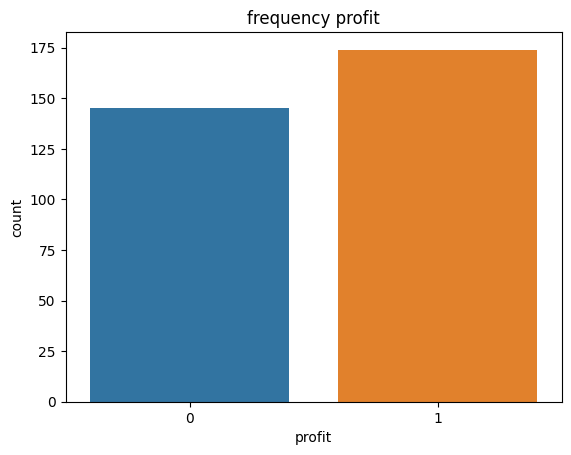

In [20]:
sns.countplot(data=df, x='profit').set(title='frequency profit')

<AxesSubplot: xlabel='Subscription_QIB'>

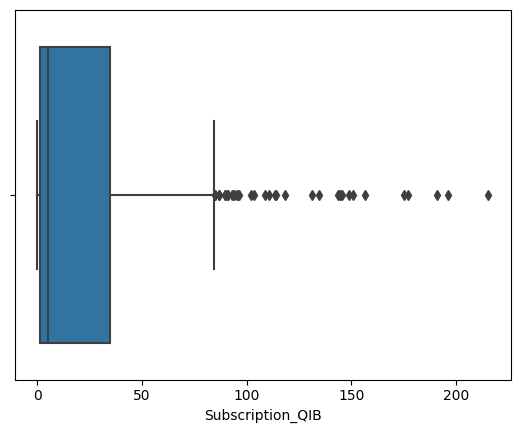

In [21]:
sns.boxplot(data=df, x='Subscription_QIB')

<AxesSubplot: xlabel='Subscription_HNI'>

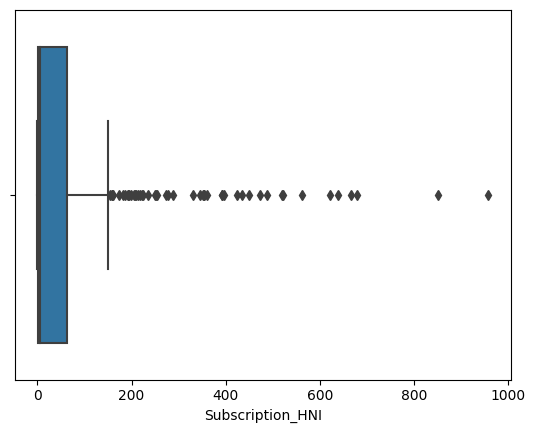

In [22]:
sns.boxplot(data=df, x='Subscription_HNI')

<AxesSubplot: xlabel='Subscription_RII'>

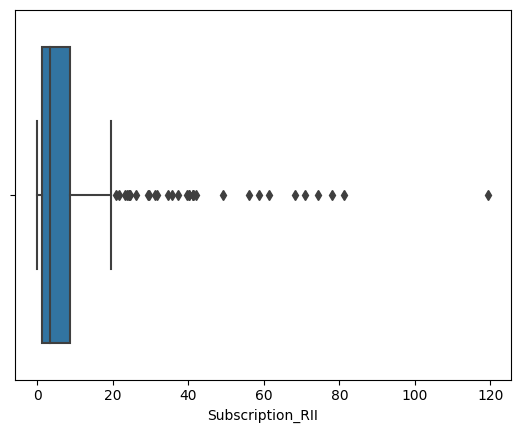

In [23]:
sns.boxplot(data=df, x='Subscription_RII')

<AxesSubplot: xlabel='profit', ylabel='Subscription_Total'>

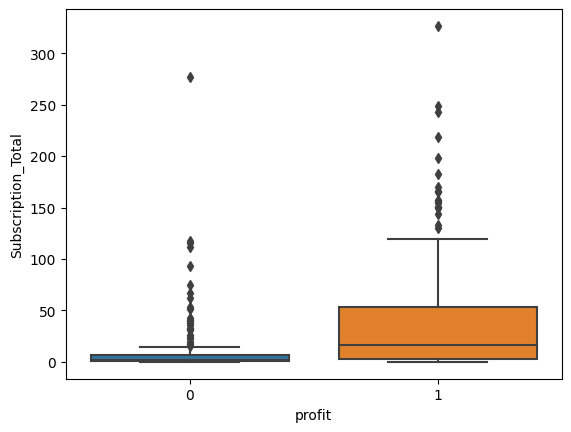

In [24]:
sns.boxplot(data=df, y='Subscription_Total', x='profit')

<AxesSubplot: xlabel='profit', ylabel='Subscription_Total'>

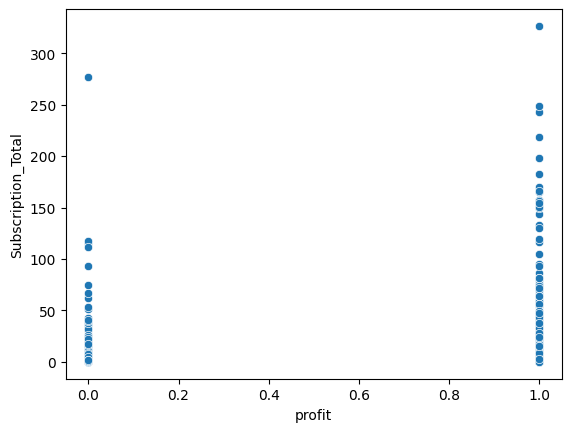

In [25]:
sns.scatterplot(data=df, y='Subscription_Total', x='profit')

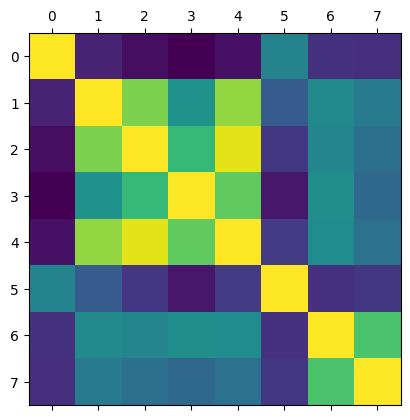

In [26]:
plt.matshow(corr)

<AxesSubplot: >

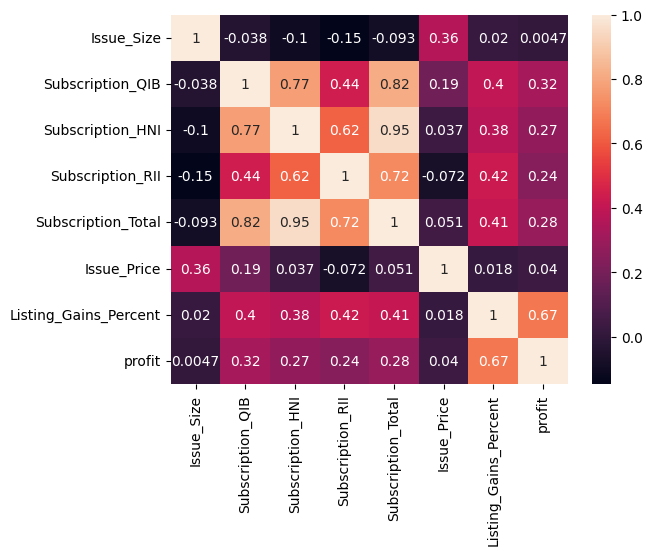

In [27]:
sns.heatmap(corr, annot=True)

In [28]:
var_out=['Subscription_QIB', 'Subscription_HNI', 'Subscription_RII', 'Subscription_Total']

In [29]:
for c in var_out:
    q1=df[c].quantile(0.25)
    q3=df[c].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    df[c]=df[c].apply(lambda x: lower if x<lower else x)
    df[c]=df[c].apply(lambda x: upper if x>upper else x)

<AxesSubplot: xlabel='Subscription_QIB'>

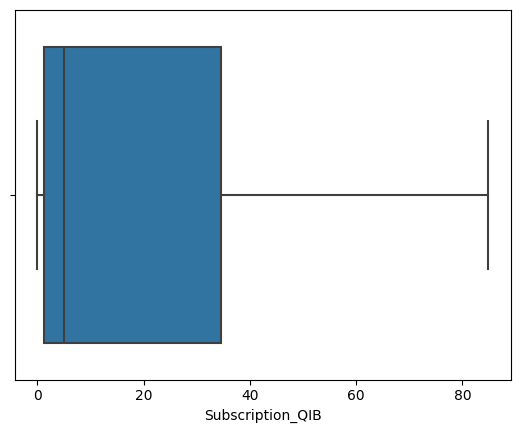

In [30]:
sns.boxplot(data=df, x='Subscription_QIB')

In [31]:
df.drop('Listing_Gains_Percent', axis=1, inplace=True)

In [32]:
target=['profit']
predictors=list(set(list(df.columns))-set(target))


In [33]:
df[predictors]=df[predictors]/df[predictors].max()

In [34]:
df.head()

,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,profit
0,0.570806,0.691337,0.565306,0.533449,1
1,0.699838,0.338756,0.193367,0.383979,0
2,0.011666,0.108246,0.318878,0.063811,1
3,0.013198,0.023801,0.031633,0.015058,0
4,0.006128,0.009912,0.115306,0.013824,0


In [35]:
df.describe()

,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,profit
count,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.253601,0.263157,0.309232,0.252489,0.545455
std,0.342961,0.374477,0.315147,0.335939,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013551,0.008184,0.065051,0.020304,0.000000
50%,0.058212,0.033061,0.174490,0.060849,1.000000
75%,0.408131,0.404910,0.439031,0.412182,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
X=df[predictors].values
y=df[target].values

In [37]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=50)

In [38]:
print(X_train.shape, X_test.shape)

(223, 4) (96, 4)


In [39]:
print(y_train.shape, y_test.shape)

(223, 1) (96, 1)


In [40]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))



In [42]:
optimizer=tf.keras.optimizers.Adam(0.1)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), metrics='accuracy', optimizer=optimizer)

In [89]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                160       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
model.fit(X_train, y_train, epochs=150, verbose=0)

In [44]:
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)


3/3 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.6667


[0.648144543170929, 0.6666666865348816]

In [45]:
y_predtr=model.predict(X_train)
y_predte=model.predict(X_test)

3/3 [==============================] - 0s 2ms/step
